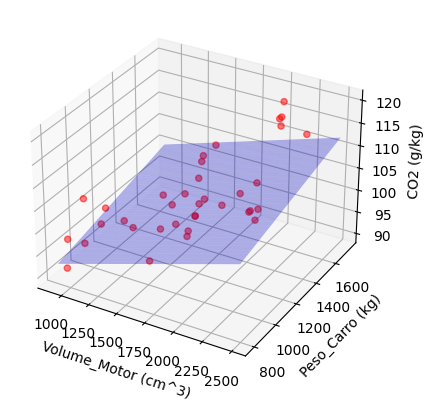

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

df = pd.read_csv('./dados/CO2_&_CARROS_1.csv', sep = ';')
#print(df)

#gerando uma lista de preditoras

x = df[['Volume_Motor', 'Peso_Carro']]
y = df[['CO2']]


ajuste_modelo = smf.ols(formula = 'CO2 ~ Volume_Motor + Peso_Carro', data = df)
equacao_ajustada = ajuste_modelo.fit()
equacao_ajustada.params

#preparando os dados para visualização
x_surf, y_surf = np.meshgrid(np.linspace(df.Volume_Motor.min(),df.Volume_Motor.max(), 100), np.linspace(df.Peso_Carro.min(), df.Peso_Carro.max(), 100))
onlyX = pd.DataFrame({'Volume_Motor':x_surf.ravel(), 'Peso_Carro':y_surf.ravel()})
fittedY = equacao_ajustada.predict(exog = onlyX)
fittedY = np.array(fittedY)

fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['Volume_Motor'], df['Peso_Carro'], df['CO2'], c = 'red', marker = 'o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color ='blue', alpha = 0.3)
ax.set_xlabel("Volume_Motor (cm^3)")
ax.set_ylabel("Peso_Carro (kg)")
ax.set_zlabel("CO2 (g/kg)")
plt.show()

Deslocar e alocar escalas

    Volume_Motor_P  Peso_Carro_P  CO2
0        -3.141939    784.662742   99
1        -2.941939   1154.662742   95
2        -3.141939    923.662742   95
3        -3.241939    859.662742   90
4        -2.641939   1134.662742  105
5        -3.141939    923.662742  105
6        -2.741939   1103.662742   90
7        -2.641939   1359.662742   92
8        -2.641939   1106.662742   98
9        -2.541939   1144.662742   99
10       -3.041939    974.662742   99
11       -2.841939    984.662742  101
12       -3.141939   1106.662742   99
13       -2.541939   1246.662742   94
14       -2.541939   1320.662742   97
15       -2.541939   1324.662742   97
16       -2.541939   1359.662742   99
17       -1.941939   1274.662742  104
18       -2.541939   1113.662742  104
19       -2.141939   1322.662742  105
20       -2.541939   1578.662742   94
21       -2.141939   1422.662742   99
22       -2.041939   1359.662742   99
23       -2.541939   1409.662742   99
24       -2.141939   1409.662742   99
25       -2.

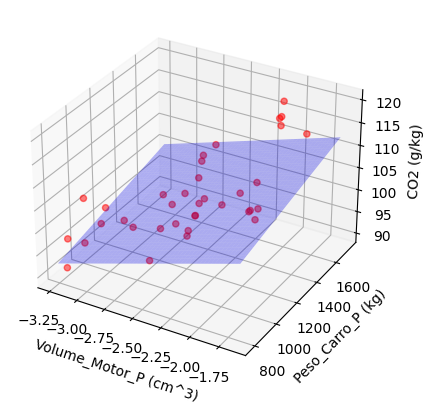

                                 OLS Regression Results                                
Dep. Variable:                    CO2   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              2307.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                    4.91e-37
Time:                        16:51:14   Log-Likelihood:                         -129.16
No. Observations:                  36   AIC:                                      262.3
Df Residuals:                      34   BIC:                                      265.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [24]:
import numpy as np
import pandas as pd
from sklearn import linear_model
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import pyplot as plt

df = pd.read_csv('./dados/CO2_&_CARROS_2.csv', sep = ';')
#print(df)

#gerando uma lista de preditoras

x1 = df[['Volume_Motor']] - df[['Volume_Motor']].mean() / df[['Volume_Motor']].std()
x2 = df[['Peso_Carro']] - df[['Peso_Carro']].mean() / df[['Peso_Carro']].std()

dados_padronizados = [x1['Volume_Motor'], x2['Peso_Carro'], df['CO2']]

novos_nomes_x1_x2_y = ['Volume_Motor_P', 'Peso_Carro_P', 'CO2']

df_P = pd.concat(dados_padronizados, axis = 1, keys = novos_nomes_x1_x2_y)

print(df_P)


ajuste_modelo = smf.ols(formula = 'CO2 ~ Volume_Motor_P + Peso_Carro_P', data = df_P)
equacao_ajustada = ajuste_modelo.fit()
equacao_ajustada.params

#preparando os dados para visualização
x_surf, y_surf = np.meshgrid(np.linspace(df_P.Volume_Motor_P.min(),df_P.Volume_Motor_P.max(), 100), np.linspace(df_P.Peso_Carro_P.min(), df_P.Peso_Carro_P.max(), 100))
onlyX = pd.DataFrame({'Volume_Motor_P':x_surf.ravel(), 'Peso_Carro_P':y_surf.ravel()})
fittedY = equacao_ajustada.predict(exog = onlyX)
fittedY = np.array(fittedY)

fig = plt.figure(dpi = 100)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_P['Volume_Motor_P'], df_P['Peso_Carro_P'], df_P['CO2'], c = 'red', marker = 'o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color ='blue', alpha = 0.3)
ax.set_xlabel("Volume_Motor_P (cm^3)")
ax.set_ylabel("Peso_Carro_P (kg)")
ax.set_zlabel("CO2 (g/kg)")
plt.show()

X = df_P[['Volume_Motor_P', 'Peso_Carro_P']]
Y = df_P[['CO2']]

modelo = sm.OLS(Y, X).fit()
print(modelo.summary())